### Car Price Prediction

Business Understanding - To develop a machine learning model which accuracly predicts the price of a car

In [5]:
# Installing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline 

#### Data Understanding

In [6]:
# Importing the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
# Concatanating dataset to creat one 
df = pd.concat([train, test])
df.shape

(27482, 18)

In [8]:
# Looking at the dataset 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
# Random Sample of the dataset 
df.sample(8)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4615,45782231,11917.0,-,BMW,330,2003,Sedan,No,Petrol,3,0 km,6.0,Manual,Rear,04-May,Left wheel,Grey,8
7208,45795993,NaN,781,SUBARU,Outback,2012,Jeep,No,Petrol,2.5,186500 km,4.0,Variator,4x4,04-May,Left wheel,Carnelian red,12
7234,45431785,NaN,1051,KIA,Sportage EX,2016,Jeep,No,Petrol,2.4,98000 km,4.0,Tiptronic,Front,04-May,Left wheel,White,6
5287,45771209,NaN,1172,MERCEDES-BENZ,E 350,2011,Coupe,Yes,Diesel,3.5,170429 km,6.0,Automatic,Rear,02-Mar,Left wheel,Silver,12
3894,45698405,NaN,1411,OPEL,Astra,2006,Universal,No,Diesel,1.9 Turbo,193000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
5050,45664403,NaN,919,BMW,X5,2012,Jeep,Yes,Diesel,3,273962 km,6.0,Automatic,4x4,04-May,Left wheel,White,0
8986,45786007,120.0,1055,NISSAN,Quest,2013,Minivan,Yes,Petrol,3.5,74000 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8
10022,45777497,9408.0,394,TOYOTA,Camry,2014,Sedan,No,Hybrid,2.5,130000 km,4.0,Automatic,Front,04-May,Left wheel,Black,12


In [10]:
# Describing the dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,27482.0,4.557857e+07,924497.166568,20746880.0,45698077.0,45772073.5,45801969.75,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.00,26307500.0
Prod. year,27482.0,2.010912e+03,5.632865,1939.0,2009.0,2012.0,2015.00,2020.0
Cylinders,27482.0,4.593734e+00,1.413918,1.0,4.0,4.0,4.00,127.0
Airbags,27482.0,6.563569e+00,4.329256,0.0,4.0,6.0,12.00,16.0


In [11]:
# Total number of missing values 
f'Total No. of missing values: {df.isnull().sum().sum()}'

'Total No. of missing values: 8245'

In [12]:
# Missing values 
df.isnull().sum()
# There is 8245 missing values in Price

ID                     0
Price               8245
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

[Text(0.5, 1.0, 'Missing values')]

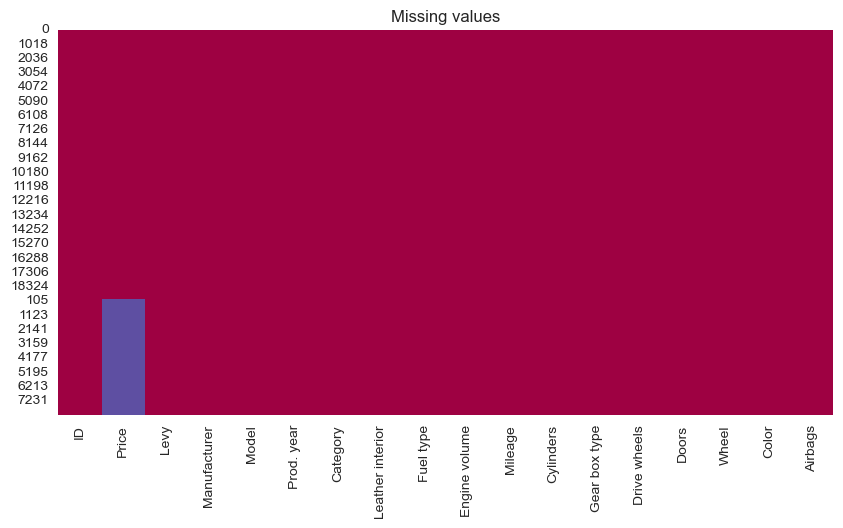

In [13]:
# Visualising the missing values 
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cmap = 'Spectral', cbar=False).set(title = 'Missing values')

__Dealing with missing values__ 

Method 1 - remove rows with missing values 
Method 2 - Replace with mean of column 

In [14]:
# Removing rows containing null 
df1 = df.dropna(how = 'any', axis = 0)
print('shape of dataset with removed null is:', df1.shape)

# Replacing with mean
df2 = df
price = df['Price'].fillna(value = (df['Price'].mean()))
df2['Price'] = price
print('shape of dataset with replaced mean is:', df2.shape)

shape of dataset with removed null is: (19237, 18)
shape of dataset with replaced mean is: (27482, 18)


<AxesSubplot: >

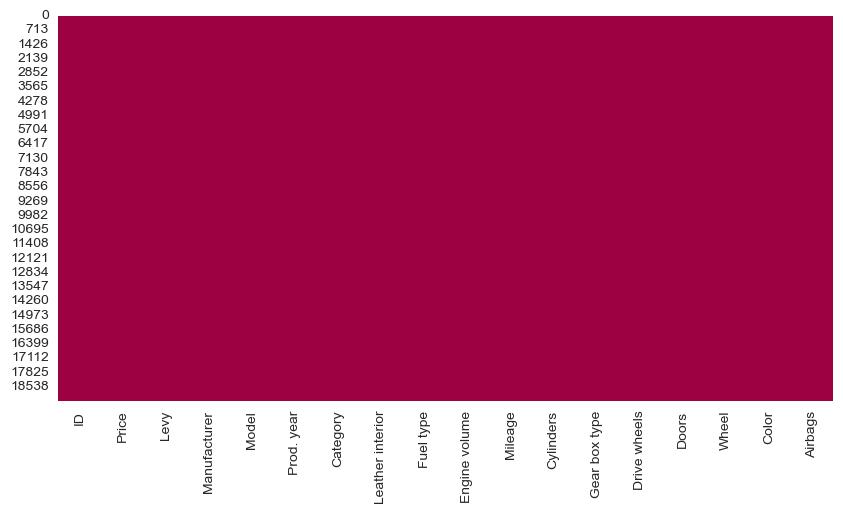

In [15]:
# Missing values after computation 
plt.figure(figsize = (10,5))
sns.heatmap(df1.isnull(), cmap = 'Spectral', cbar = False)

In [16]:
# Unique values in the dataset 
df1.nunique() 

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [17]:
# ID has numerous unqiue values and appears irrelevent 
df1.drop('ID', axis = 1, inplace=True)

C:\Users\jacks\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# Viewing the dataset 
df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [19]:
# Removing - values in Levy 
df1['Levy'] = df1['Levy'].replace(to_replace = '-', value = np.nan)
df1.isnull().sum()

# Removing null values in the dataframe 
df1.dropna(how = 'any', axis = 0, inplace = True)

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3546533021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Levy'] = df1['Levy'].replace(to_replace = '-', value = np.nan)
C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3546533021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how = 'any', axis = 0, inplace = True)


In [20]:
# Value types
df1['Levy'].unique()

# Converting Levy to int type 
df1['Levy'] = df1['Levy'].astype(int)

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\253177591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Levy'] = df1['Levy'].astype(int)


In [21]:
# Removing Turbo from Engine volume

# Creating column indicating turbo and no turbo 
df1['Turbo'] = np.where(df1['Engine volume'].str.contains('Turbo'), 1, 0)

# Removing string Turbo 
df1['Engine volume'] = df1['Engine volume'].str.replace('Turbo', '')

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\1399616749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Turbo'] = np.where(df1['Engine volume'].str.contains('Turbo'), 1, 0)
C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\1399616749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Engine volume'] = df1['Engine volume'].str.replace('Turbo', '')


In [22]:
# Converting Engine Volume to float 
df1['Engine volume'] = df1['Engine volume'].astype(float)

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3395238137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Engine volume'] = df1['Engine volume'].astype(float)


In [23]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.000000,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.000000,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467.000000,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607.000000,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726.000000,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,18555.927224,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4.0,Manual,Front,04-May,Left wheel,Blue,6
8241,45682346,18555.927224,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6
8242,45649860,18555.927224,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0
8243,45809706,18555.927224,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4.0,Automatic,Front,04-May,Left wheel,Green,4


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13418 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13418 non-null  float64
 1   Levy              13418 non-null  int32  
 2   Manufacturer      13418 non-null  object 
 3   Model             13418 non-null  object 
 4   Prod. year        13418 non-null  int64  
 5   Category          13418 non-null  object 
 6   Leather interior  13418 non-null  object 
 7   Fuel type         13418 non-null  object 
 8   Engine volume     13418 non-null  float64
 9   Mileage           13418 non-null  object 
 10  Cylinders         13418 non-null  float64
 11  Gear box type     13418 non-null  object 
 12  Drive wheels      13418 non-null  object 
 13  Doors             13418 non-null  object 
 14  Wheel             13418 non-null  object 
 15  Color             13418 non-null  object 
 16  Airbags           13418 non-null  int64 

In [25]:
# Removing km from mileage 
df1['Mileage'] = df1['Mileage'].str.replace('km', '')

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\799590544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mileage'] = df1['Mileage'].str.replace('km', '')


In [26]:
# Convert mileage to interger 
df1['Mileage'] = df1['Mileage'].astype(int)

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\863606330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mileage'] = df1['Mileage'].astype(int)


In [27]:
df1

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
5,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802.0,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,0
19233,15681.0,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108.0,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331.0,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [28]:
# Adjusting values in Doors 

df1['Doors'] = np.where(df1['Doors'] == '04-May', 4, df1['Doors'])
df1['Doors'] = np.where(df1['Doors'] == '02-Mar', 2, df1['Doors'])
df1['Doors'] = np.where(df1['Doors'] == '>5', 5, df1['Doors'])
df1['Doors'].unique()

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3994521376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Doors'] = np.where(df1['Doors'] == '04-May', 4, df1['Doors'])
C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3994521376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Doors'] = np.where(df1['Doors'] == '02-Mar', 2, df1['Doors'])
C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\3994521376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

array([4, 2, 5], dtype=object)

In [29]:
# Converting doors to type integer 
df1['Doors'] = df1['Doors'].astype(int)

C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\2823892901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Doors'] = df1['Doors'].astype(int)


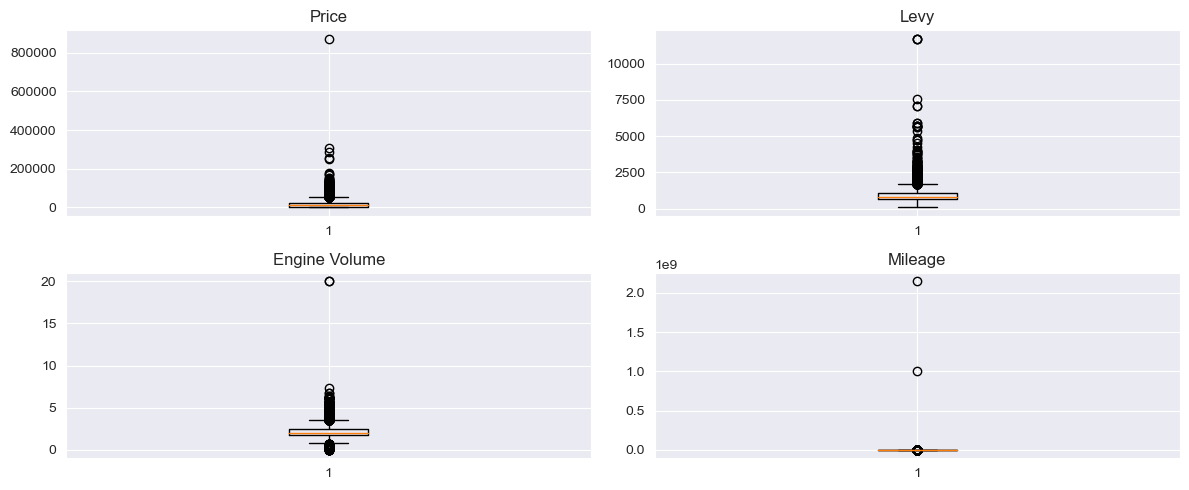

In [30]:
# Outlier Analysis 

fig, axes = plt.subplots(figsize = (12,5), ncols = 2, nrows = 2)

axes[0,0].boxplot(df1['Price'])
axes[0,0].set_title('Price')

axes[0,1].boxplot(df1['Levy'])
axes[0,1].set_title('Levy')

axes[1,0].boxplot(df1['Engine volume'])
axes[1,0].set_title('Engine Volume')

axes[1,1].boxplot(df1['Mileage'])
axes[1,1].set_title('Mileage')

plt.tight_layout()

In [31]:
# Showing distribution of Price 
df1['Price'].sort_values(ascending = False)

8541     872946.0
5008     308906.0
7749     288521.0
5840     254024.0
15283    250574.0
           ...   
14492         3.0
9730          3.0
14642         3.0
4776          3.0
16992         1.0
Name: Price, Length: 13418, dtype: float64

In [32]:
# Removing outliers using Standard Deviation method  
sd = 3

col_outlier = ['Price', 'Levy', 'Engine Volume', 'Mileage']

# Price
upper_limit = df1['Price'].mean() + sd*df1['Price'].std()
lower_limit = df1['Price'].mean() - sd*df1['Price'].std()    

df1 = df1[(df1['Price'] < upper_limit) & (df1['Price'] > lower_limit)]


# Levy
upper_limit = df1['Levy'].mean() + sd*df1['Levy'].std()
lower_limit = df1['Levy'].mean() - sd*df1['Levy'].std()    

df1 = df1[(df1['Levy'] < upper_limit) & (df1['Levy'] > lower_limit)]

# Engine Volume
upper_limit = df1['Engine volume'].mean() + sd*df1['Engine volume'].std()
lower_limit = df1['Engine volume'].mean() - sd*df1['Engine volume'].std()    

df1 = df1[(df1['Engine volume'] < upper_limit) & (df1['Engine volume'] > lower_limit)]


# Mileage
upper_limit = df1['Mileage'].mean() + sd*df1['Mileage'].std()
lower_limit = df1['Mileage'].mean() - sd*df1['Mileage'].std()    

df1 = df1[(df1['Mileage'] < upper_limit) & (df1['Mileage'] > lower_limit)]

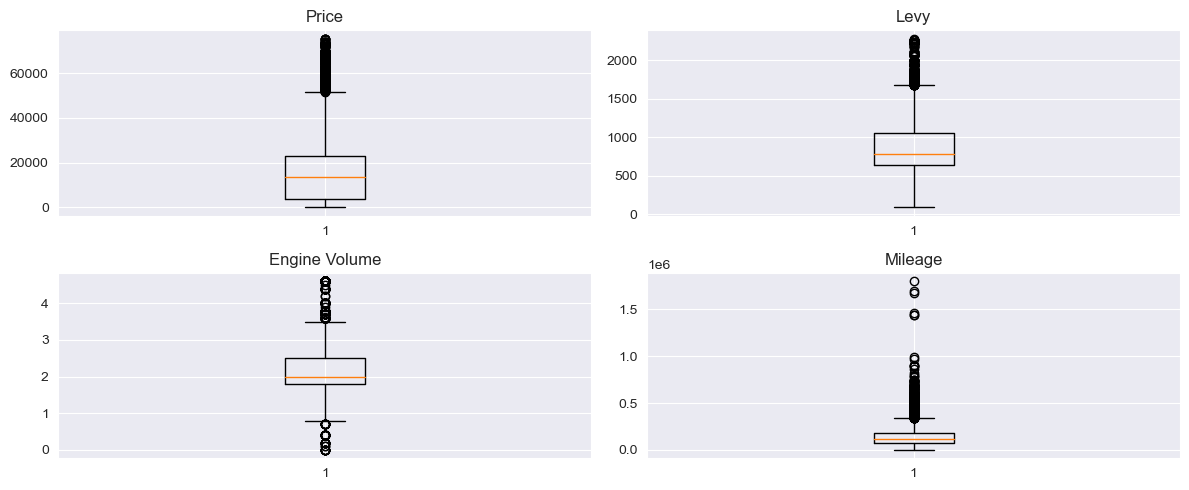

In [33]:
# Reevaluating the distributions after outlier removal 
fig, axes = plt.subplots(figsize = (12,5), ncols = 2, nrows = 2)

axes[0,0].boxplot(df1['Price'])
axes[0,0].set_title('Price')

axes[0,1].boxplot(df1['Levy'])
axes[0,1].set_title('Levy')

axes[1,0].boxplot(df1['Engine volume'])
axes[1,0].set_title('Engine Volume')

axes[1,1].boxplot(df1['Mileage'])
axes[1,1].set_title('Mileage')

plt.tight_layout()

In [34]:
df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
5,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,0


### Exploratory Analysis

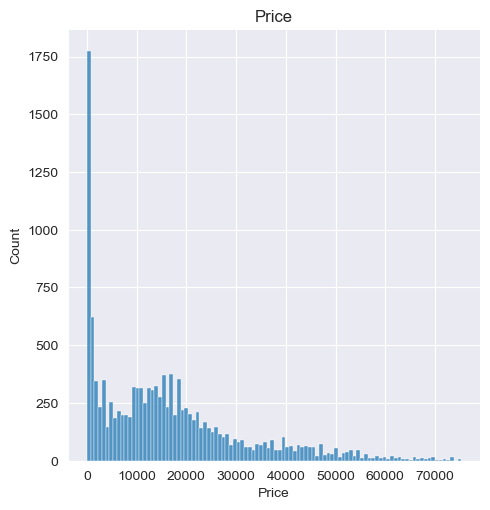

In [35]:
# Distribution of Price
sns.displot(df1['Price'], bins = 100).set(title = 'Price')

In [36]:
# Price per manufacturer 
price_man = pd.DataFrame(df1.groupby('Manufacturer').mean()['Price'].sort_values(ascending=False).head())
price_man

,Price
Manufacturer,
TESLA,53941.000000
SKODA,46101.000000
LAND ROVER,42232.777778
SSANGYONG,30914.247727
JEEP,25371.730337


In [37]:
# Most Expensive models 
df1.pivot_table(values = 'Price', index = ['Manufacturer', 'Model']).sort_values(by = 'Price', ascending=False).head()

,,Price
Manufacturer,Model,
SUZUKI,Jimny GLX,75300.0
BMW,635,73698.0
LEXUS,RC F F SPORT,68994.0
MERCEDES-BENZ,C 300 6.3 AMG Package,67426.0
LAND ROVER,Land Rover Sport,67426.0


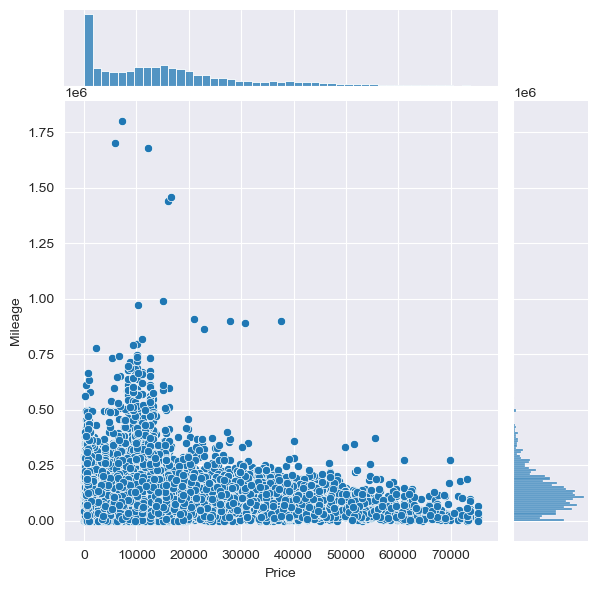

In [38]:
# Relationship between Price and mileage 
sns.jointplot(data = df1, x = 'Price', y = 'Mileage')

<AxesSubplot: xlabel='Prod. year', ylabel='Price'>

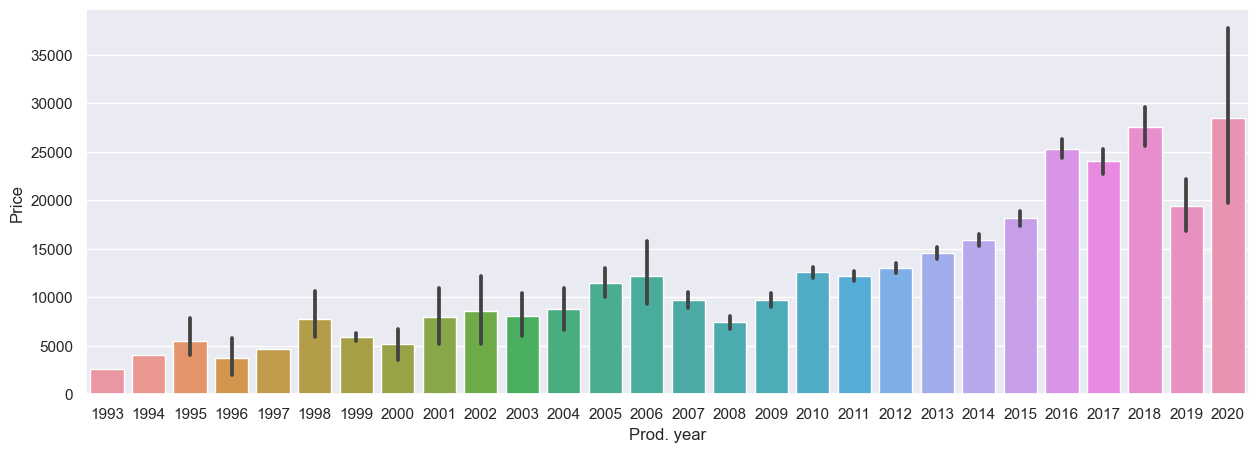

In [39]:
# Production year and Price
sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = df1, x = 'Prod. year', y = 'Price')

In [40]:
df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
5,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,0


[Text(0.5, 1.0, 'Price per Gear box type')]

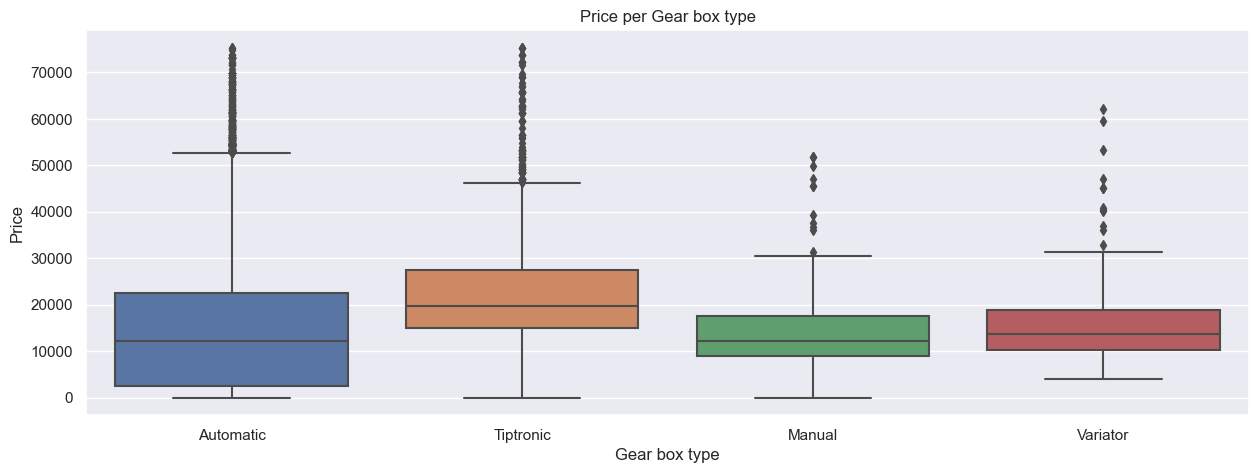

In [41]:
# Price of Gear Box Type 
sns.boxplot(x = 'Gear box type', y = 'Price', data = df1).set(title = 'Price per Gear box type')

In [42]:
# Correlation analysis on Price 
df1.corr()['Price'].sort_values()

Mileage         -0.238650
Airbags         -0.222291
Cylinders       -0.060494
Engine volume   -0.025096
Doors            0.024081
Levy             0.029844
Turbo            0.117964
Prod. year       0.306328
Price            1.000000
Name: Price, dtype: float64

<AxesSubplot: >

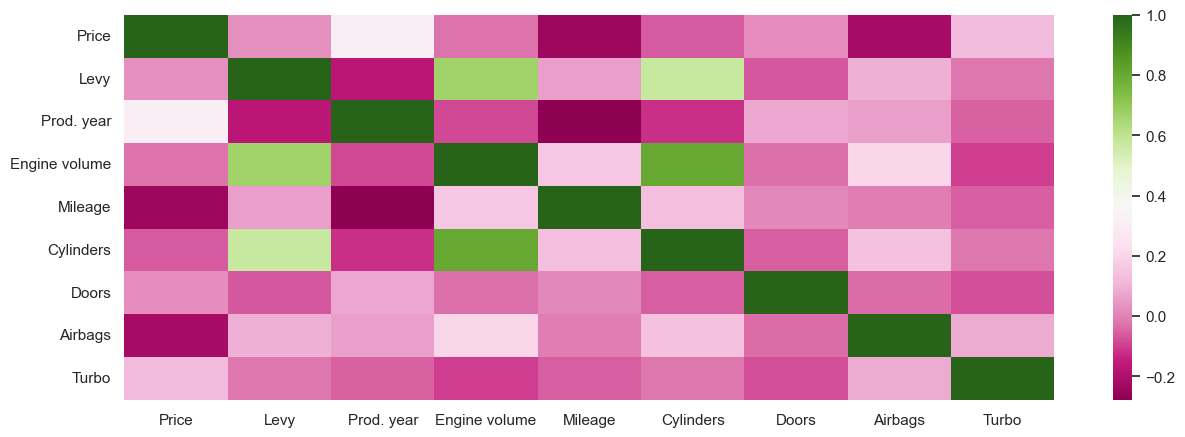

In [43]:
# General Correlation analysis 
sns.heatmap(df1.corr(), cmap = "PiYG")

In [44]:
# Removing highly correlated features 
cor_matrix = df1.corr().abs()

# Keeping the upper triangle of the matrix 
upper_tri = cor_matrix.where(np.triu(cor_matrix, k = 1).astype(np.bool))

upper_tri

# Selecting columns with correlation greater than the threshold 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print('The following the features have been dropped:', to_drop[0])
to_drop

for i in range(0, len(to_drop), 2): 
    df1= df1.drop(to_drop[i], axis = 1)
   

The following the features have been dropped: Engine volume


C:\Users\jacks\AppData\Local\Temp\ipykernel_44916\2119762944.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(cor_matrix, k = 1).astype(np.bool))


In [45]:
df1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
5,39493.0,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,160931,4.0,Automatic,Front,4,Left wheel,White,4,0


In [46]:
# Convert categorical variables to dummy 
cate_feat = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 
          'Wheel', 'Color']

dummy = pd.DataFrame()
Category = pd.get_dummies(df1['Category'])  
Interior_lea = pd.get_dummies(df1['Leather interior'])
Manufactures = pd.get_dummies(df1['Manufacturer'])
Mods = pd.get_dummies(df1['Model'])
Fuelt = pd.get_dummies(df1['Fuel type'])
GBtype = pd.get_dummies(df1['Gear box type'])
DW = pd.get_dummies(df1['Drive wheels'])
Dor = pd.get_dummies(df1['Doors'])
Whel = pd.get_dummies(df1['Wheel'])
col = pd.get_dummies(df1['Color'])

df_cat = pd.concat([Category, Interior_lea, Manufactures, Mods, Fuelt, GBtype, DW, Dor, Whel, col], axis = 1)

# Joining categorical to numeric 
df1 = pd.concat([df1, df_cat], axis = 1)

In [47]:
# Removing original categorical variables from dataset 
for col in cate_feat: 
    df1.drop(col, axis = 1, inplace = True)

In [48]:
# Checking shape of dataframe
df1.shape

(13006, 818)

In [49]:
# Final look at data 
df1

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Turbo,Cabriolet,Coupe,Goods wagon,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
0,13328.0,1399,2010,186005,6.0,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621.0,1018,2011,192000,6.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607.0,862,2011,168966,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726.0,446,2014,91901,4.0,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493.0,891,2016,160931,4.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802.0,1055,2013,107800,6.0,12,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19233,15681.0,831,2011,161600,4.0,8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108.0,836,2010,116365,4.0,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,5331.0,1288,2007,51258,4.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

### Linear Regression

In [50]:
# LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

# Split datasets 
X = df1.drop('Price', axis = 1)
Y = df1['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [57]:
# Fitting the model
#model.fit(X_train, Y_train)

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [58]:
# Saving the model 
import pickle
pickle.dump(model, open('Linear_Regression_Model', 'wb'))

In [60]:
# Loading the model 
model = pickle.load(open('Linear_Regression_Model', 'rb'))

In [61]:
# Predictions 
pred = model.predict(X_test)

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# Evaluation 

In [ ]:
# Interpreting the linear model 
#import statsmodels.api as snf 
#snf.OLS(Y, X).fit()
#print(model.summary())

In [62]:
# Evaluting performance of the model 
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE is', mean_absolute_error(Y_test, pred))
print('MSE is', mean_squared_error(Y_test, pred))

MAE is 7783.45166669368
MSE is 117218259.75878975


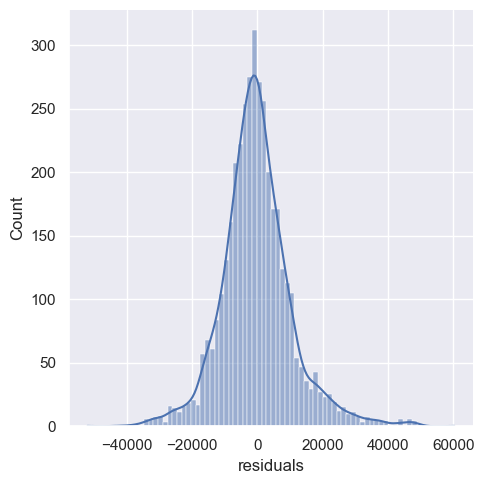

In [63]:
# Dataframe with actual and prediction 
evaluation_df = pd.DataFrame(np.array(Y_test), columns = ['Actual'])
evaluation_df['Prediction'] = np.array(pred)
evaluation_df['residuals'] = evaluation_df['Actual'] - evaluation_df['Prediction']
sns.displot(data = evaluation_df, x = 'residuals', kde = True)

# Model was the correct choice for the data as the residuals are normally distributed 

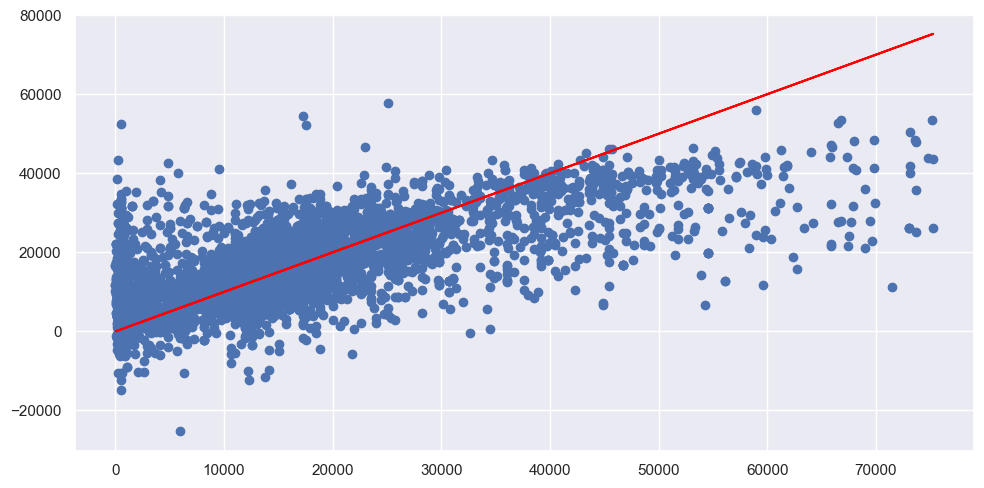

In [64]:
# Plotting the relationship between predictions and actual 
plt.figure(figsize = (10,5))
plt.scatter(Y_test, pred)
plt.tight_layout()
plt.plot(Y_test, Y_test, 'red')

In [65]:
# Predicting value using model 
new_car = df1.drop('Price', axis = 1).loc[50].values
new_car = new_car.reshape(-1,817)
new_prediction = model.predict(new_car)

In [66]:
# Difference between the predicted and actual 
abs(df1.iloc[50]['Price'] - new_prediction)

array([6166.75645408])

---------------------------------------------------------------------------------------------------------------

### Random Forest 

In [86]:
# Split datasets 
X = df1.drop('Price', axis = 1)
Y = df1['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [87]:
# Scaling the input
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jacks\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [88]:
# Initiating the model 
from sklearn.ensemble import RandomForestClassifier
#random_forest = RandomForestClassifier()

In [89]:
# fitting the Random Forest
#random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [91]:
# Saving the model
#import pickle
#pickle.dump(random_forest, open('random_forest', 'wb'))

In [93]:
# Loading the model 
random_forest = pickle.load(open('random_forest', 'rb'))

In [95]:
# Predicting X_test
predictions = random_forest.predict(X_test)

In [96]:
# Evaluation 
print('MSE is:', mean_squared_error(predictions, Y_test))

MSE is: 78312530.0399795


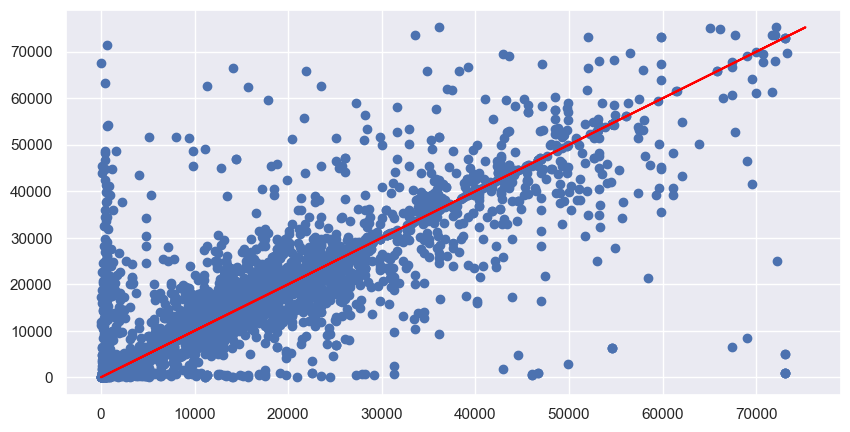

In [98]:
plt.figure(figsize = (10,5))
plt.scatter(predictions, Y_test)
plt.plot(Y_test, Y_test, 'red')

### Randomised Search

In [ ]:
# Took too long and too much memory on local computer 

In [71]:
# Randomised Search parameter grid

# PARAMETERS

# Number of trees in forest 
#n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]

# Number of features to consider at each split 
#max_features = ['auto', 'sqrt', 'log2']

# Method of sampling data points - with or without replacment 
#bootstrap = [True, False]


# Grid Search params
#params = {'n_estimators': n_estimators, 
#         'max_features': max_features,
#          'bootstrap': bootstrap}

In [75]:
# Randomised Search 
#from sklearn.model_selection import RandomizedSearchCV
#randomfr = RandomizedSearchCV(estimator = random_forest, param_distributions=params, n_iter=100, cv = 5, verbose = 100, 
#                  scoring = 'neg_mean_squared_error')

In [82]:
# Showing the best parameters
#randomfr.best_params_

In [ ]:
# Predictions 
#predictions = randomfr.predict(X_test)

In [ ]:
# mse evaluation 
#mean_squared_error(predictions, Y_test)

-------------------------------------------------------------------------------------------------------------

### Neural Network - ScikitLearn

In [101]:
# Creating  x and y np arrays 
X = df1.drop('Price', axis = 1).values
Y = df1['Price'].values 

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [102]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Create MLP instance 
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(max_iter=100, activation='relu', solver='adam', hidden_layer_sizes = (100,100,100))

In [109]:
# Creating Multiple Layer Perceptron model and fitting 
NN_model.fit(X_train, Y_train)

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=100)

Text(0.5, 1.0, 'Model Loss across iterations')

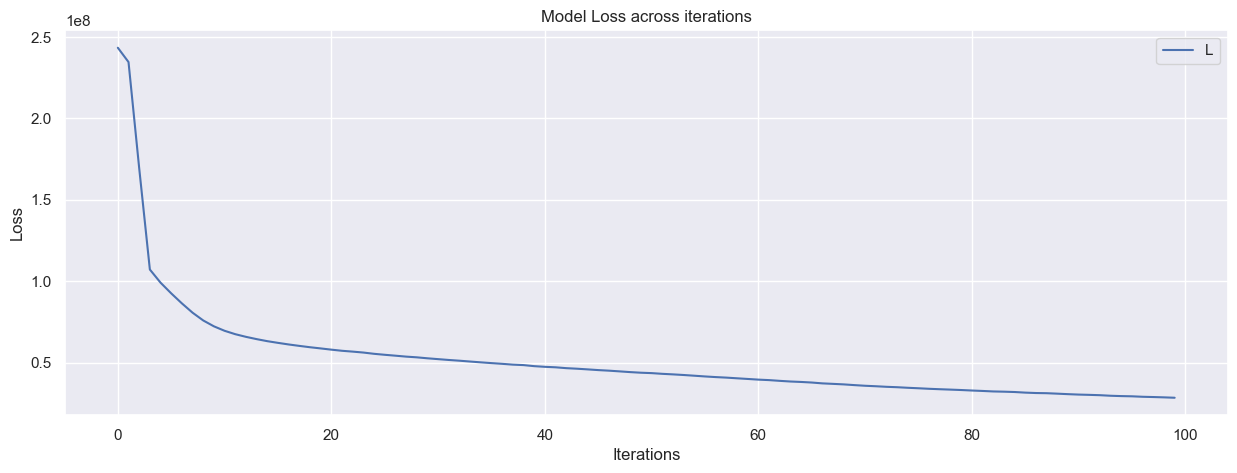

In [140]:
# Plotting the loss function 
plt.figure(figsize = (15,5))
plt.plot(pd.DataFrame(NN_model.loss_curve_, columns=['loss']))
plt.legend("Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Model Loss across iterations')

In [122]:
# Predicting using the Neural Network
prediction = NN_model.predict(X_test)

In [124]:
# Evaulation metrics 
mean_squared_error(prediction, Y_test)

77420162.7612065

In [138]:
# Predicting new record 
new_car = df1.drop('Price', axis = 1).iloc[0].values
new_car = new_car.reshape(-1,817)
new_car = NN_model.predict((scaler.transform(new_car)))

# Difference between prediction and actual 
abs(df1.loc[0]['Price']-new_car)

array([7079.05177292])

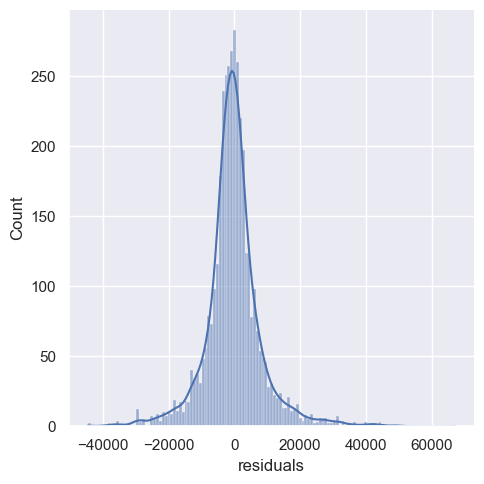

In [147]:
# Visualising the residuals 
df = pd.DataFrame(Y_test, columns=['Actual'])
df['Predicted'] = prediction
df['residuals'] = df['Actual'] - df['Predicted']

sns.displot(df['residuals'], kde = True)

 The best model appears to be the Neural Network. We could improve on this by running a Randomised search and continue with hyperparameter tuning. Given processing inhibitors, this project finishes here  